# Premiers modèles prédictifs du nombre de vélibs d'un point de vue spatial

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn import linear_model
from math import sqrt

!pip install prettytable
from prettytable import PrettyTable

In [5]:
velib = pd.read_csv(r"/Users/Romain/Documents/Romain/ENSAE 2A 2020-2021/Stat'App/Github Stat'App/velib_clean.csv")
velib.head()

,station_id,10/19/20;18:01:51,10/19/20;18:06:52,10/19/20;18:11:52,10/19/20;18:16:52,10/19/20;18:21:52,10/19/20;18:26:53,10/19/20;18:31:53,10/19/20;18:36:53,10/19/20;18:41:54,...,11/03/20;16:01:46,11/03/20;16:06:47,11/03/20;16:11:47,11/03/20;16:16:47,11/03/20;16:21:48,11/03/20;16:26:48,11/03/20;16:31:48,11/03/20;16:36:49,11/03/20;16:41:49,11/03/20;16:46:49
0,213688169,"{'mechanical': 0, 'ebike': 2}","{'mechanical': 0, 'ebike': 2}","{'mechanical': 0, 'ebike': 2}","{'mechanical': 0, 'ebike': 3}","{'mechanical': 0, 'ebike': 3}","{'mechanical': 1, 'ebike': 2}","{'mechanical': 0, 'ebike': 1}","{'mechanical': 0, 'ebike': 1}","{'mechanical': 0, 'ebike': 1}",...,"{'mechanical': 4, 'ebike': 6}","{'mechanical': 4, 'ebike': 6}","{'mechanical': 3, 'ebike': 6}","{'mechanical': 4, 'ebike': 7}","{'mechanical': 5, 'ebike': 7}","{'mechanical': 5, 'ebike': 7}","{'mechanical': 5, 'ebike': 8}","{'mechanical': 5, 'ebike': 8}","{'mechanical': 5, 'ebike': 8}","{'mechanical': 5, 'ebike': 7}"
1,99950133,"{'mechanical': 41, 'ebike': 5}","{'mechanical': 41, 'ebike': 5}","{'mechanical': 42, 'ebike': 5}","{'mechanical': 42, 'ebike': 7}","{'mechanical': 41, 'ebike': 5}","{'mechanical': 40, 'ebike': 4}","{'mechanical': 38, 'ebike': 5}","{'mechanical': 39, 'ebike': 4}","{'mechanical': 40, 'ebike': 5}",...,"{'mechanical': 2, 'ebike': 0}","{'mechanical': 2, 'ebike': 0}","{'mechanical': 2, 'ebike': 0}","{'mechanical': 2, 'ebike': 1}","{'mechanical': 2, 'ebike': 1}","{'mechanical': 2, 'ebike': 0}","{'mechanical': 2, 'ebike': 0}","{'mechanical': 2, 'ebike': 0}","{'mechanical': 2, 'ebike': 0}","{'mechanical': 2, 'ebike': 0}"
2,516709288,"{'mechanical': 0, 'ebike': 1}","{'mechanical': 0, 'ebike': 1}","{'mechanical': 0, 'ebike': 1}","{'mechanical': 1, 'ebike': 1}","{'mechanical': 1, 'ebike': 1}","{'mechanical': 1, 'ebike': 1}","{'mechanical': 2, 'ebike': 1}","{'mechanical': 0, 'ebike': 1}","{'mechanical': 0, 'ebike': 1}",...,"{'mechanical': 1, 'ebike': 2}","{'mechanical': 1, 'ebike': 2}","{'mechanical': 1, 'ebike': 2}","{'mechanical': 1, 'ebike': 2}","{'mechanical': 1, 'ebike': 2}","{'mechanical': 1, 'ebike': 3}","{'mechanical': 1, 'ebike': 2}","{'mechanical': 1, 'ebike': 3}","{'mechanical': 1, 'ebike': 3}","{'mechanical': 1, 'ebike': 3}"
3,36255,"{'mechanical': 0, 'ebike': 0}","{'mechanical': 0, 'ebike': 0}","{'mechanical': 0, 'ebike': 0}","{'mechanical': 0, 'ebike': 0}","{'mechanical': 0, 'ebike': 2}","{'mechanical': 0, 'ebike': 4}","{'mechanical': 0, 'ebike': 4}","{'mechanical': 0, 'ebike': 4}","{'mechanical': 1, 'ebike': 3}",...,"{'mechanical': 0, 'ebike': 3}","{'mechanical': 0, 'ebike': 3}","{'mechanical': 0, 'ebike': 3}","{'mechanical': 0, 'ebike': 3}","{'mechanical': 0, 'ebike': 2}","{'mechanical': 0, 'ebike': 2}","{'mechanical': 0, 'ebike': 3}","{'mechanical': 0, 'ebike': 3}","{'mechanical': 0, 'ebike': 3}","{'mechanical': 0, 'ebike': 2}"
4,37815204,"{'mechanical': 4, 'ebike': 1}","{'mechanical': 3, 'ebike': 1}","{'mechanical': 1, 'ebike': 1}","{'mechanical': 1, 'ebike': 1}","{'mechanical': 2, 'ebike': 1}","{'mechanical': 3, 'ebike': 1}","{'mechanical': 3, 'ebike': 2}","{'mechanical': 2, 'ebike': 0}","{'mechanical': 2, 'ebike': 0}",...,"{'mechanical': 6, 'ebike': 0}","{'mechanical': 7, 'ebike': 0}","{'mechanical': 7, 'ebike': 0}","{'mechanical': 7, 'ebike': 1}","{'mechanical': 7, 'ebike': 1}","{'mechanical': 8, 'ebike': 1}","{'mechanical': 9, 'ebike': 0}","{'mechanical': 10, 'ebike': 0}","{'mechanical': 9, 'ebike': 0}","{'mechanical': 9, 'ebike': 0}"


### Mise en forme des données

In [6]:
# Création d'une fonction pour convertir le format des données en un dictionnaire.
def to_dictionary(jour):
    """transformer le format en dico"""
    try :
        dictionary = eval(jour)
    except:
        dictionary = {'mechanical': 0, 'ebike': 0}
    
    return dictionary

# Mise en forme du dataframe velib en mettant le nombre de vélos dans un dictionnaire
col_vide='[{}, {}]'
colonnes_vides=[]
for j in velib.columns:
    if velib[j][0]==col_vide:
        print(j)
        colonnes_vides.append(j)
velib=velib.drop(colonnes_vides,axis=1)

# On applique la fonction pour convertir en dictionnaire
longueur_du_dataframe = len(velib.iloc[1])
for i,j in enumerate(velib.columns[1:]):
    velib[j] = [to_dictionary(i) for i in velib[j]]

In [7]:
velib.head()

,station_id,10/19/20;18:01:51,10/19/20;18:06:52,10/19/20;18:11:52,10/19/20;18:16:52,10/19/20;18:21:52,10/19/20;18:26:53,10/19/20;18:31:53,10/19/20;18:36:53,10/19/20;18:41:54,...,11/03/20;16:01:46,11/03/20;16:06:47,11/03/20;16:11:47,11/03/20;16:16:47,11/03/20;16:21:48,11/03/20;16:26:48,11/03/20;16:31:48,11/03/20;16:36:49,11/03/20;16:41:49,11/03/20;16:46:49
0,213688169,"{'mechanical': 0, 'ebike': 2}","{'mechanical': 0, 'ebike': 2}","{'mechanical': 0, 'ebike': 2}","{'mechanical': 0, 'ebike': 3}","{'mechanical': 0, 'ebike': 3}","{'mechanical': 1, 'ebike': 2}","{'mechanical': 0, 'ebike': 1}","{'mechanical': 0, 'ebike': 1}","{'mechanical': 0, 'ebike': 1}",...,"{'mechanical': 4, 'ebike': 6}","{'mechanical': 4, 'ebike': 6}","{'mechanical': 3, 'ebike': 6}","{'mechanical': 4, 'ebike': 7}","{'mechanical': 5, 'ebike': 7}","{'mechanical': 5, 'ebike': 7}","{'mechanical': 5, 'ebike': 8}","{'mechanical': 5, 'ebike': 8}","{'mechanical': 5, 'ebike': 8}","{'mechanical': 5, 'ebike': 7}"
1,99950133,"{'mechanical': 41, 'ebike': 5}","{'mechanical': 41, 'ebike': 5}","{'mechanical': 42, 'ebike': 5}","{'mechanical': 42, 'ebike': 7}","{'mechanical': 41, 'ebike': 5}","{'mechanical': 40, 'ebike': 4}","{'mechanical': 38, 'ebike': 5}","{'mechanical': 39, 'ebike': 4}","{'mechanical': 40, 'ebike': 5}",...,"{'mechanical': 2, 'ebike': 0}","{'mechanical': 2, 'ebike': 0}","{'mechanical': 2, 'ebike': 0}","{'mechanical': 2, 'ebike': 1}","{'mechanical': 2, 'ebike': 1}","{'mechanical': 2, 'ebike': 0}","{'mechanical': 2, 'ebike': 0}","{'mechanical': 2, 'ebike': 0}","{'mechanical': 2, 'ebike': 0}","{'mechanical': 2, 'ebike': 0}"
2,516709288,"{'mechanical': 0, 'ebike': 1}","{'mechanical': 0, 'ebike': 1}","{'mechanical': 0, 'ebike': 1}","{'mechanical': 1, 'ebike': 1}","{'mechanical': 1, 'ebike': 1}","{'mechanical': 1, 'ebike': 1}","{'mechanical': 2, 'ebike': 1}","{'mechanical': 0, 'ebike': 1}","{'mechanical': 0, 'ebike': 1}",...,"{'mechanical': 1, 'ebike': 2}","{'mechanical': 1, 'ebike': 2}","{'mechanical': 1, 'ebike': 2}","{'mechanical': 1, 'ebike': 2}","{'mechanical': 1, 'ebike': 2}","{'mechanical': 1, 'ebike': 3}","{'mechanical': 1, 'ebike': 2}","{'mechanical': 1, 'ebike': 3}","{'mechanical': 1, 'ebike': 3}","{'mechanical': 1, 'ebike': 3}"
3,36255,"{'mechanical': 0, 'ebike': 0}","{'mechanical': 0, 'ebike': 0}","{'mechanical': 0, 'ebike': 0}","{'mechanical': 0, 'ebike': 0}","{'mechanical': 0, 'ebike': 2}","{'mechanical': 0, 'ebike': 4}","{'mechanical': 0, 'ebike': 4}","{'mechanical': 0, 'ebike': 4}","{'mechanical': 1, 'ebike': 3}",...,"{'mechanical': 0, 'ebike': 3}","{'mechanical': 0, 'ebike': 3}","{'mechanical': 0, 'ebike': 3}","{'mechanical': 0, 'ebike': 3}","{'mechanical': 0, 'ebike': 2}","{'mechanical': 0, 'ebike': 2}","{'mechanical': 0, 'ebike': 3}","{'mechanical': 0, 'ebike': 3}","{'mechanical': 0, 'ebike': 3}","{'mechanical': 0, 'ebike': 2}"
4,37815204,"{'mechanical': 4, 'ebike': 1}","{'mechanical': 3, 'ebike': 1}","{'mechanical': 1, 'ebike': 1}","{'mechanical': 1, 'ebike': 1}","{'mechanical': 2, 'ebike': 1}","{'mechanical': 3, 'ebike': 1}","{'mechanical': 3, 'ebike': 2}","{'mechanical': 2, 'ebike': 0}","{'mechanical': 2, 'ebike': 0}",...,"{'mechanical': 6, 'ebike': 0}","{'mechanical': 7, 'ebike': 0}","{'mechanical': 7, 'ebike': 0}","{'mechanical': 7, 'ebike': 1}","{'mechanical': 7, 'ebike': 1}","{'mechanical': 8, 'ebike': 1}","{'mechanical': 9, 'ebike': 0}","{'mechanical': 10, 'ebike': 0}","{'mechanical': 9, 'ebike': 0}","{'mechanical': 9, 'ebike': 0}"


In [154]:
type(velib['station_id'][2])

numpy.int64

In [155]:
def to_str(var):
    if type(var) is list:
        return str(var)[1:-1] # list
    if type(var) is np.ndarray:
        try:
            return str(list(var[0]))[1:-1] # numpy 1D array
        except TypeError:
            return str(list(var))[1:-1] # numpy sequence
    return str(var) # everything else

In [161]:
type(velib['station_id'][2])

numpy.int64

In [164]:
np.str(velib['station_id'][2])

'516709288'

In [167]:
toutes_les_stations = []
for i in range(len(velib)):
    toutes_les_stations.append(np.str(velib['station_id'][i]))

In [19]:
velib['10/19/20;18:01:51'][1]['mechanical']

41

# Prédiction du nombre de vélos à la date t+1 en entrainant l'algorithme à la date t : exemple du 1er novembre à 10h pour prédire le 2 novembre à 10h. 

In [12]:
tous_les_velibs = velib.copy()

D'abord, on ne considère que les colonnes correspondant au 1er novembre et au 2 novembre.

In [60]:
colonnest1 = ['station_id']
colonnest2 = ['station_id']
date1 = "11/01/20"
date2 = "11/02/20"

for i in tous_les_velibs:
    if (date1 in i):
        colonnest1.append(i)
    elif (date2 in i):
        colonnest2.append(i)

### On construit les 2 dataframes qui nous intéressent : **df1** à la date T et **df2** à la date T+1

In [113]:
df_t1 = velib[colonnest1].set_index('station_id').transpose()
df_t2 = velib[colonnest2].set_index('station_id').transpose()

In [114]:
df_t1.head()

station_id,213688169,99950133,516709288,36255,37815204,100769544,85002689,54000559,85043758,123095125,...,125881065,54000627,15377776,84961467,54000629,27415004,27415128,27414937,66507230,100227241
11/01/20;00:04:43,"{'mechanical': 2, 'ebike': 4}","{'mechanical': 24, 'ebike': 6}","{'mechanical': 4, 'ebike': 9}","{'mechanical': 4, 'ebike': 9}","{'mechanical': 22, 'ebike': 6}","{'mechanical': 25, 'ebike': 6}","{'mechanical': 17, 'ebike': 15}","{'mechanical': 3, 'ebike': 5}","{'mechanical': 1, 'ebike': 3}","{'mechanical': 27, 'ebike': 1}",...,"{'mechanical': 4, 'ebike': 4}","{'mechanical': 19, 'ebike': 2}","{'mechanical': 3, 'ebike': 1}","{'mechanical': 4, 'ebike': 7}","{'mechanical': 8, 'ebike': 4}","{'mechanical': 21, 'ebike': 5}","{'mechanical': 6, 'ebike': 6}","{'mechanical': 19, 'ebike': 8}","{'mechanical': 6, 'ebike': 1}","{'mechanical': 9, 'ebike': 1}"
11/01/20;00:09:43,"{'mechanical': 2, 'ebike': 3}","{'mechanical': 25, 'ebike': 5}","{'mechanical': 4, 'ebike': 9}","{'mechanical': 4, 'ebike': 9}","{'mechanical': 22, 'ebike': 6}","{'mechanical': 25, 'ebike': 6}","{'mechanical': 17, 'ebike': 15}","{'mechanical': 3, 'ebike': 5}","{'mechanical': 1, 'ebike': 3}","{'mechanical': 27, 'ebike': 1}",...,"{'mechanical': 4, 'ebike': 4}","{'mechanical': 19, 'ebike': 2}","{'mechanical': 3, 'ebike': 1}","{'mechanical': 4, 'ebike': 7}","{'mechanical': 8, 'ebike': 4}","{'mechanical': 21, 'ebike': 5}","{'mechanical': 6, 'ebike': 6}","{'mechanical': 19, 'ebike': 8}","{'mechanical': 6, 'ebike': 1}","{'mechanical': 9, 'ebike': 1}"
11/01/20;00:14:44,"{'mechanical': 2, 'ebike': 3}","{'mechanical': 25, 'ebike': 5}","{'mechanical': 4, 'ebike': 9}","{'mechanical': 4, 'ebike': 9}","{'mechanical': 22, 'ebike': 6}","{'mechanical': 25, 'ebike': 6}","{'mechanical': 17, 'ebike': 15}","{'mechanical': 3, 'ebike': 5}","{'mechanical': 1, 'ebike': 3}","{'mechanical': 27, 'ebike': 1}",...,"{'mechanical': 4, 'ebike': 4}","{'mechanical': 19, 'ebike': 2}","{'mechanical': 3, 'ebike': 1}","{'mechanical': 4, 'ebike': 7}","{'mechanical': 8, 'ebike': 4}","{'mechanical': 21, 'ebike': 5}","{'mechanical': 6, 'ebike': 6}","{'mechanical': 19, 'ebike': 8}","{'mechanical': 6, 'ebike': 1}","{'mechanical': 9, 'ebike': 1}"
11/01/20;00:19:44,"{'mechanical': 2, 'ebike': 2}","{'mechanical': 25, 'ebike': 5}","{'mechanical': 4, 'ebike': 9}","{'mechanical': 4, 'ebike': 8}","{'mechanical': 22, 'ebike': 6}","{'mechanical': 25, 'ebike': 6}","{'mechanical': 17, 'ebike': 15}","{'mechanical': 3, 'ebike': 5}","{'mechanical': 1, 'ebike': 3}","{'mechanical': 27, 'ebike': 1}",...,"{'mechanical': 4, 'ebike': 4}","{'mechanical': 19, 'ebike': 2}","{'mechanical': 3, 'ebike': 1}","{'mechanical': 4, 'ebike': 7}","{'mechanical': 8, 'ebike': 4}","{'mechanical': 21, 'ebike': 5}","{'mechanical': 6, 'ebike': 5}","{'mechanical': 19, 'ebike': 8}","{'mechanical': 6, 'ebike': 1}","{'mechanical': 9, 'ebike': 1}"
11/01/20;00:24:44,"{'mechanical': 2, 'ebike': 2}","{'mechanical': 25, 'ebike': 5}","{'mechanical': 4, 'ebike': 9}","{'mechanical': 4, 'ebike': 8}","{'mechanical': 22, 'ebike': 6}","{'mechanical': 25, 'ebike': 6}","{'mechanical': 17, 'ebike': 15}","{'mechanical': 3, 'ebike': 5}","{'mechanical': 1, 'ebike': 3}","{'mechanical': 27, 'ebike': 1}",...,"{'mechanical': 4, 'ebike': 4}","{'mechanical': 19, 'ebike': 2}","{'mechanical': 3, 'ebike': 1}","{'mechanical': 4, 'ebike': 7}","{'mechanical': 8, 'ebike': 4}","{'mechanical': 21, 'ebike': 5}","{'mechanical': 6, 'ebike': 5}","{'mechanical': 19, 'ebike': 8}","{'mechanical': 6, 'ebike': 1}","{'mechanical': 9, 'ebike': 1}"


### On s'intéresse ensuite au nombre total de vélos par stations :

In [115]:
# On parcourt les lignes et on ne garde que le nombre total de vélibs à l'heure souhaitée
for station in df_t1:
    for i in range(len(df_t1)):
        df_t1[station][i] = df_t1[station][i]['mechanical'] + df_t1[station][i]['ebike']
        df_t2[station][i] = df_t2[station][i]['mechanical'] + df_t2[station][i]['ebike']

In [116]:
df_t1.head()

station_id,213688169,99950133,516709288,36255,37815204,100769544,85002689,54000559,85043758,123095125,...,125881065,54000627,15377776,84961467,54000629,27415004,27415128,27414937,66507230,100227241
11/01/20;00:04:43,6,30,13,13,28,31,32,8,4,28,...,8,21,4,11,12,26,12,27,7,10
11/01/20;00:09:43,5,30,13,13,28,31,32,8,4,28,...,8,21,4,11,12,26,12,27,7,10
11/01/20;00:14:44,5,30,13,13,28,31,32,8,4,28,...,8,21,4,11,12,26,12,27,7,10
11/01/20;00:19:44,4,30,13,12,28,31,32,8,4,28,...,8,21,4,11,12,26,11,27,7,10
11/01/20;00:24:44,4,30,13,12,28,31,32,8,4,28,...,8,21,4,11,12,26,11,27,7,10


In [117]:
df_t2.head()

station_id,213688169,99950133,516709288,36255,37815204,100769544,85002689,54000559,85043758,123095125,...,125881065,54000627,15377776,84961467,54000629,27415004,27415128,27414937,66507230,100227241
11/02/20;00:02:33,8,30,12,2,16,28,28,13,8,32,...,5,19,4,24,15,13,12,18,12,14
11/02/20;00:07:33,8,30,11,2,16,28,28,13,8,32,...,5,19,4,24,15,13,12,18,12,14
11/02/20;00:12:34,8,30,11,2,16,28,28,13,8,32,...,5,19,4,24,15,13,12,17,12,14
11/02/20;00:17:34,8,30,11,2,16,28,28,13,8,32,...,5,19,4,24,15,13,12,17,12,14
11/02/20;00:22:35,8,30,11,2,16,28,28,13,8,32,...,5,19,4,24,15,13,12,17,12,14


In [118]:
# On reformate les données pour les manipuler
df_t1.reset_index(inplace=True)
df_t2.reset_index(inplace=True)

# On supprime les colonnes inutiles
df_t1 = df_t1.drop(['index'], axis = 1)
df_t2 = df_t2.drop(['index'], axis = 1)

# On convertit le nom des colonnes en string
df_t1.columns = toutes_les_stations
df_t2.columns = toutes_les_stations

In [170]:
df_t1.head()

,213688169,99950133,516709288,36255,37815204,100769544,85002689,54000559,85043758,123095125,...,125881065,54000627,15377776,84961467,54000629,27415004,27415128,27414937,66507230,100227241
0,6,30,13,13,28,31,32,8,4,28,...,8,21,4,11,12,26,12,27,7,10
1,5,30,13,13,28,31,32,8,4,28,...,8,21,4,11,12,26,12,27,7,10
2,5,30,13,13,28,31,32,8,4,28,...,8,21,4,11,12,26,12,27,7,10
3,4,30,13,12,28,31,32,8,4,28,...,8,21,4,11,12,26,11,27,7,10
4,4,30,13,12,28,31,32,8,4,28,...,8,21,4,11,12,26,11,27,7,10


### Construction variable à prédire Y : une station random à la date t+1 i.e. le 2 novembre

On choisit aléatoirement la station numéro **213688169**, ce qui correspond à la station **Benjamin Godard - Victor Hugo** et qui dispose d'une capacité maximale de **35 vélibs**

#### Information sur les stations avec la table `station_information` : 
- capacity : nombre de bornettes dans la station
- lat : latitude de la station (au format WGS84)
- lon : longitude de la station (au format WGS84)
- name : nom de la station
- station_id : identifiant unique associé à la station. Ce numéro identifie la station au sein du service Vélib’ Métropole

In [120]:
import urllib.request
import json
from pandas.io.json import json_normalize

In [121]:
request= urllib.request.Request('https://velib-metropole-opendata.smoove.pro/opendata/Velib_Metropole/station_information.json')
response = urllib.request.urlopen(request)
station_info = response.read()
data = json.loads(station_info)
df_station_info = json_normalize(data['data']['stations'])
df_station_info = df_station_info.sort_values(by = 'capacity', ascending = False)
df_station_info = df_station_info.reset_index()
df_station_info.head()

,index,station_id,name,lat,lon,capacity,stationCode,rental_methods
0,891,389788858,Emeriau - Beaugrenelle,48.847912,2.284306,74,15030,[CREDITCARD]
1,52,85008390,Grenelle - Dr Finlay,48.851315,2.291950,71,15028,[CREDITCARD]
2,482,76199110,Université Paris Dauphine,48.870708,2.274866,70,16004,[CREDITCARD]
3,796,100783424,Censier - Santeuil,48.840659,2.353752,69,5034,[CREDITCARD]
4,1315,54000610,Jean de la Fontaine - Boulainvilliers,48.852648,2.275866,68,16025,[CREDITCARD]


In [122]:
df_station_info[df_station_info['station_id'] == 213688169]

,index,station_id,name,lat,lon,capacity,stationCode,rental_methods
441,0,213688169,Benjamin Godard - Victor Hugo,48.865983,2.275725,35,16107,NaN


### Création du df pour le ML

In [173]:
df_y = df_t2[['213688169']]
df_y.columns = ['y']
df_y.head()

,y
0,8
1,8
2,8
3,8
4,8


On ajoute cette colonne au dataframe de toutes les stations à la date t : 

In [174]:
df_ml = pd.concat([df_t1, df_y], axis = 1)
df_ml

,213688169,99950133,516709288,36255,37815204,100769544,85002689,54000559,85043758,123095125,...,54000627,15377776,84961467,54000629,27415004,27415128,27414937,66507230,100227241,y
0,6,30,13,13,28,31,32,8,4,28,...,21,4,11,12,26,12,27,7,10,8
1,5,30,13,13,28,31,32,8,4,28,...,21,4,11,12,26,12,27,7,10,8
2,5,30,13,13,28,31,32,8,4,28,...,21,4,11,12,26,12,27,7,10,8
3,4,30,13,12,28,31,32,8,4,28,...,21,4,11,12,26,11,27,7,10,8
4,4,30,13,12,28,31,32,8,4,28,...,21,4,11,12,26,11,27,7,10,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,8,30,12,2,16,28,28,13,8,30,...,19,4,24,15,13,12,19,12,15,9
282,8,30,12,2,16,28,28,13,8,30,...,19,4,24,15,13,12,19,12,14,8
283,8,30,12,2,16,28,28,13,8,30,...,19,4,24,15,13,12,19,12,14,9
284,8,30,12,2,16,28,28,13,8,30,...,19,4,24,15,13,12,18,12,14,9


### Sélection des features

In [268]:
df_ml = df_ml.astype('float64')

In [269]:
df_ml.corr()

,213688169,99950133,516709288,36255,37815204,100769544,85002689,54000559,85043758,123095125,...,54000627,15377776,84961467,54000629,27415004,27415128,27414937,66507230,100227241,y
213688169,1.000000,0.180946,-0.029903,-0.270653,-0.357012,-0.258148,-0.365987,0.273324,0.384876,0.106682,...,-0.381281,-0.419914,0.335322,0.246529,-0.366259,0.022102,-0.292475,0.125049,0.328254,0.157214
99950133,0.180946,1.000000,0.738871,0.583496,0.233941,-0.140385,0.512620,0.072574,-0.491756,0.528778,...,-0.098404,-0.417694,-0.454738,-0.632456,0.494729,-0.303547,0.553276,-0.683817,-0.356078,0.472200
516709288,-0.029903,0.738871,1.000000,0.719678,0.422147,-0.274146,0.677085,-0.164184,-0.601327,0.604564,...,-0.084724,-0.492212,-0.784323,-0.698533,0.768792,-0.320279,0.645915,-0.723503,-0.499214,0.580020
36255,-0.270653,0.583496,0.719678,1.000000,0.277324,0.175037,0.863245,-0.016605,-0.769908,0.483026,...,0.388534,-0.040605,-0.818509,-0.851621,0.687772,-0.607614,0.904185,-0.920466,-0.753756,0.287044
37815204,-0.357012,0.233941,0.422147,0.277324,1.000000,-0.205415,0.236450,-0.760486,-0.391186,0.204852,...,0.073949,-0.256306,-0.330000,-0.221910,0.763226,0.431948,0.231951,-0.171470,-0.202907,0.152608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27415128,0.022102,-0.303547,-0.320279,-0.607614,0.431948,-0.333889,-0.598943,-0.540620,0.474210,-0.101894,...,-0.317914,-0.185179,0.521242,0.520720,-0.068411,1.000000,-0.625361,0.627874,0.456922,-0.088278
27414937,-0.292475,0.553276,0.645915,0.904185,0.231951,0.194788,0.880574,0.038571,-0.776625,0.402418,...,0.438887,0.010787,-0.780415,-0.810494,0.633764,-0.625361,1.000000,-0.863036,-0.741260,0.258885
66507230,0.125049,-0.683817,-0.723503,-0.920466,-0.171470,-0.143010,-0.815357,-0.094431,0.722509,-0.440557,...,-0.279026,0.113021,0.719594,0.810159,-0.573915,0.627874,-0.863036,1.000000,0.691127,-0.268794
100227241,0.328254,-0.356078,-0.499214,-0.753756,-0.202907,-0.214869,-0.763040,0.041567,0.512998,-0.336517,...,-0.310991,0.035677,0.680801,0.642665,-0.567692,0.456922,-0.741260,0.691127,1.000000,-0.233544


In [245]:
def choix_features(heatmap, target, seuil):
    """
    heatmap : matrice de corrélation
    target : variable à prédire (output)
    seuil : seuil minimum à partir duquel on accepte une variable dans la modélisation (en valeur absolue)
    Fonction qui renvoie la liste des features sélectionnées pour la modélisation
    """
    features = []
    variables = list(heatmap)
    for i in range(len(heatmap)-1):
        if abs(heatmap[target][i]) > seuil:
            features.append(variables[i])
    return features

In [280]:
# On l'applique à notre jeu de données
features = choix_features(df_ml.corr(),'y',0.6)
features

['123095125',
 '54000612',
 '88230992',
 '506455295',
 '101740379',
 '129088667',
 '1057228658',
 '210582921',
 '102290754',
 '54000569',
 '336511521',
 '27363489',
 '42603855',
 '27415466',
 '583171360',
 '82387816',
 '613737748',
 '245187072',
 '27415665',
 '1765749389',
 '213992316',
 '213694482',
 '35908',
 '210573120',
 '213688824',
 '1062223873',
 '568135465',
 '214102967',
 '473204291',
 '27399735',
 '129125489',
 '129077035',
 '35196898',
 '37521',
 '653129412',
 '254224239',
 '10968855',
 '27246227',
 '653059015',
 '27363137',
 '7304',
 '129042700',
 '120827885',
 '315525484',
 '249554935',
 '27363256',
 '129161858',
 '1036226943',
 '66505513',
 '41610121',
 '1599931563',
 '124390478',
 '392576677',
 '287096529',
 '38319086',
 '35147530',
 '96512532',
 '653125838',
 '1057179405',
 '653080383',
 '6295',
 '1057045129',
 '85155919',
 '369011098',
 '389788858',
 '653083263',
 '15212034',
 '1057730786',
 '210395439',
 '82336035',
 '1057737444',
 '285001735',
 '36391',
 '100934967',

In [281]:
len(features)

103

In [249]:
len(df_t1)

286

### Régression linéaire

In [285]:
X = df_ml.loc[:,features]
Y = df_ml.loc[:,'y']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [286]:
# Machine Learning : Régression linéaire simple
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_prediction = regressor.predict(X_test)
y_prediction = np.round(y_prediction)

print(sqrt(mean_squared_error(y_test, y_prediction)))

0.8212299340934686


Text(0, 0.5, 'Nombre prédit de vélibs disponibles dans la station choisie')

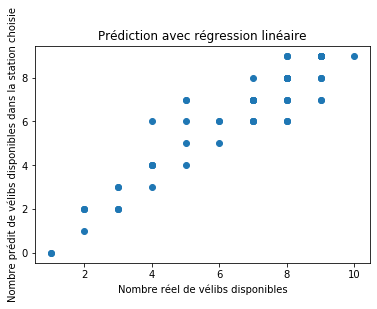

In [287]:
plt.scatter(y_test,y_prediction)
plt.title("Prédiction avec régression linéaire")
plt.xlabel("Nombre réel de vélibs disponibles")
plt.ylabel("Nombre prédit de vélibs disponibles dans la station choisie")

Text(0.5, 15.0, 'Qualité prédite')

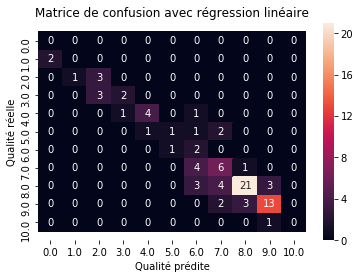

In [291]:
cm_regression = confusion_matrix(y_test,y_prediction)
cm = pd.DataFrame(cm_regression, index = np.linspace(0,10,11), columns = np.linspace(0,10,11))
ax = sns.heatmap(cm, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Matrice de confusion avec régression linéaire")
plt.ylabel('Qualité réelle')
plt.xlabel('Qualité prédite')

In [292]:
precision_score(y_test, y_prediction, average = 'weighted')

0.6709044125049597

Précision du modèle de 0.67. En gros 2/3 des prédictions sont bonnes pour cette station vélib

In [293]:
recall_score(y_test, y_prediction, average = 'weighted')

0.6046511627906976